In [1]:
import numpy as np
import random 
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

np.set_printoptions(suppress=True)
np.random.seed(1)
%matplotlib inline

In [2]:
#extract dataframes corresponding to countries
def countryDF(country):
    countryData = df[df['Country'] == country]
    return countryData

#extract columns
def columnExtractor(dataframe, columnName):
    values = dataframe[columnName]
    return values 

# plot values for dataset columns    
def plotQuantities(qty1, qty2, xlabel, ylabel, label, title):
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.scatter(qty1, qty2, label=label)
    plt.title(title)
    plt.legend()
    plt.show()

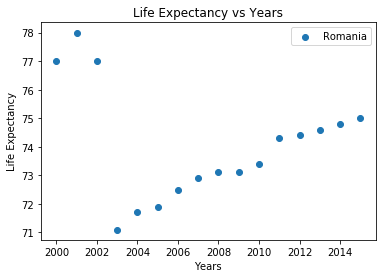

/home/mihir/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:357: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [3]:
#reading data from csv 
df = pd.read_csv('datasets_12603_17232_Life Expectancy Data.csv')

# Quantity variation of 3 countries (Germany, Netherlands, Spain)
#change here 
country = 'Romania'
countryDF = countryDF(country)
countryQuantity = columnExtractor(countryDF,'Life expectancy ')

years = columnExtractor(countryDF,'Year')
#plotQuantities(years, countryQuantity,'Years','Population', country,'Population vs Years')
plotQuantities(years, countryQuantity, 'Years', 'Life Expectancy', country, 'Life Expectancy vs Years')


# convention followed in relation to scikit documentation 
# y = countryQuantity 
# y1 = countryQuantityTrain
# Y = countryQuantityTest
# y_pred = countryQuantityPredict

# X = years 
# X1 = yearsTrain
# x_mis = yearsTest
# x = yearsPredict

# c = combinedZip

countryQuantity = countryQuantity.tolist()
years = years.tolist()

combinedZip = list(zip(years,countryQuantity))
random.shuffle(combinedZip) 

years,countryQuantity = zip(*combinedZip) 

countryQuantity = list(countryQuantity)
countryQuantityTrain = countryQuantity[:12]

years = list(years)
yearsTrain = years[:12]


countryQuantityTest = countryQuantity[12:]
yearsTest = years[12:]

countryQuantity = countryQuantityTrain 
years = yearsTrain

countryQuantity = np.asarray(countryQuantity).reshape(-1,1)
years = np.asarray(years).reshape(-1,1)

countryQuantityTest = np.asarray(countryQuantityTest).reshape(-1,1)
yearsTest = np.asarray(yearsTest).reshape(-1,1)

# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
#x = np.atleast_2d(np.linspace(0, 10, 1000)).T
yearsPredict = np.array(np.linspace(2000, 2015, 16)).reshape(-1,1)

# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)

# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(years, countryQuantity)

# Make the prediction on the meshed x-axis (ask for MSE as well)
countryQuantityPredict, sigma = gp.predict(yearsPredict, return_std=True)

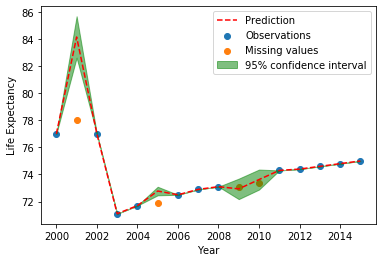

In [4]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE

def plotFinal(years, countryQuantity, yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, yearsPredict, countryQuantityPredict, ylabel):
    plt.figure()

    #plt.plot(x, Y, 'r--',label=r'$f(x) = x\,\sin(x)$')
    #actual data 
    plt.scatter(years, countryQuantity,label='Observations')

    #estimate
    plt.plot(yearsPredict, countryQuantityPredict, 'r--', label='Prediction')
    plt.scatter(yearsTest,countryQuantityTest,label='Missing values')

    #plt.fill(np.concatenate([x, x[::-1]]),
    #         np.concatenate([y_pred - 1.9600 * sigma,
    #                        (y_pred + 1.9600 * sigma)[::-1]])[:,6],
    #         alpha=1, fc='b', ec='None', label='95% confidence interval')


    plt.fill_between(yearsPredict.flat, (countryQuantityPredict.flat-2*sigma), (countryQuantityPredict.flat+2*sigma), 
                     color='green',alpha=0.5,label='95% confidence interval')
    plt.ylabel(ylabel)
    plt.xlabel('Year')

    plt.legend()
    
#change here 
plotFinal(years, countryQuantity, yearsTrain, countryQuantityTrain, yearsTest, countryQuantityTest, yearsPredict, countryQuantityPredict, 'Life Expectancy')

# print('year  \n',columnExtractor(countryDF,'Year').tolist())
# print('countryQuantity \n',columnExtractor(countryDF,'Life expectancy ').tolist())

# print('yearsTrain \n',yearsTrain)
# print('countryQuantityTrain \n',countryQuantityTrain)

# print('yearsTest \n',yearsTest)
# print('countryQuantityTest \n',countryQuantityTest)

# print('yearsPredict \n',yearsPredict.T)
# print('countryQuantityPredict \n',countryQuantityPredict.T)

[[ 2.66666667 12.51351277  3.21715818 -4.43548387 -3.49932705 -0.84833523
  -0.82079343 -0.27359781  0.27434842  0.60184267  2.39781157  3.62622036
   4.64135021 -3.11688312 -4.1025641  -2.5974026 ]]


Text(0.5, 0, 'Year')

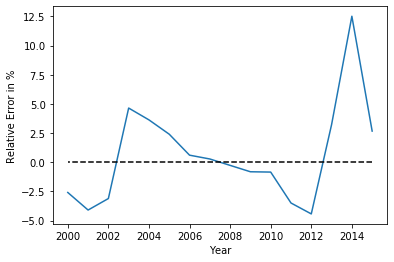

In [5]:
years = columnExtractor(countryDF,'Year').tolist()
error = ((countryQuantityPredict.T - columnExtractor(countryDF,'Life expectancy ').tolist())/columnExtractor(countryDF,'Life expectancy ').tolist() )*100
print(error) 
plt.plot(years,error.T)
plt.plot(years,np.zeros((len(years),1)),'k--')
plt.ylabel('Relative Error in %')
plt.xlabel('Year')